In [ ]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
import rdkit
import os 

import matplotlib.pyplot as plt

from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import (LeaveOneOut, cross_val_predict,
                                     cross_val_score, train_test_split)

import numpy as np 
print(rdkit.__version__)

In [ ]:
molecules = []
fnames = []
lnames = []
labels = []

for dir in os.listdir('./data'):
    if os.path.isdir('./data/'+dir):
        for file in os.listdir('./data/'+dir):
            if file.endswith('.pdb'):
                m = rdkit.Chem.rdmolfiles.MolFromPDBFile('./data/'+dir+"/"+file)
                if m is None:
                    print("Error reading file:", file)
                else:
                    molecules.append(m)
                    fnames.append(dir.rstrip().lstrip())

fp = open('./data/labels.txt', 'r')

for line in fp:
    sline = line.rstrip().lstrip().split()
    lnames.append(sline[1])
    labels.append(float(sline[-1]))

fp.close()

fingersize = 64
rdgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=fingersize)

np_bits_l = []
np_counts_l = []

for m in molecules:
    np_bits = rdgen.GetFingerprintAsNumPy(m)
    np_bits_l.append(np_bits)
    np_counts = rdgen.GetCountFingerprintAsNumPy(m)
    np_counts_l.append(np_counts)

In [ ]:
np_bits_features = []
np_counts_features = []
Y = []
names = []

s_fnames = set(fnames)
s_lnames = set(lnames)
s_int = s_fnames.intersection(s_lnames)
for molname in s_int:
    #get index of molname in fnames
    idx = fnames.index(molname)
    np_bits_features.append(np_bits_l[idx])
    np_counts_features.append(np_counts_l[idx])
    #get index of molname in lnames
    idx2 = lnames.index(molname)
    Y.append(labels[idx2])
    names.append(molname)

Y = np.array(Y)
np_bits_features = np.array(np_bits_features)
np_counts_features = np.array(np_counts_features)

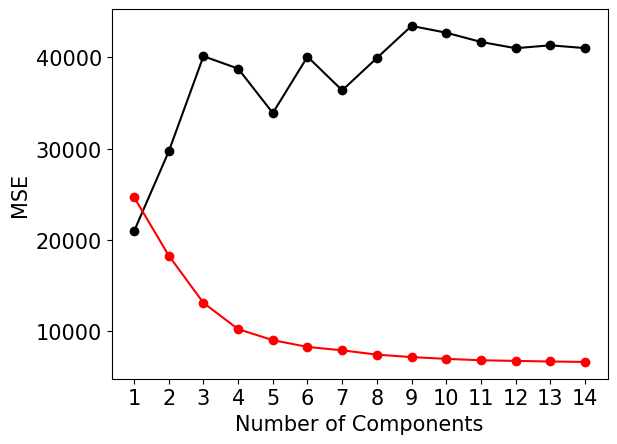

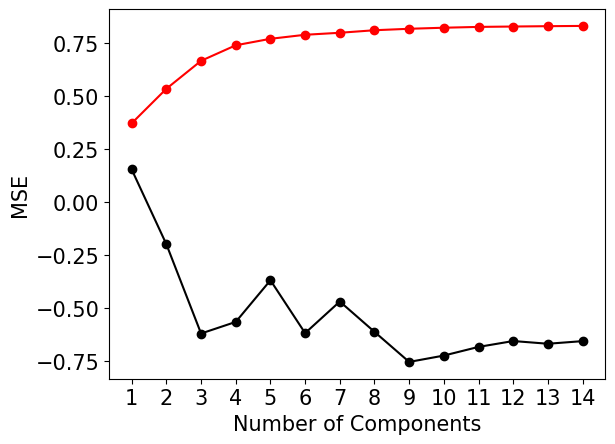

In [16]:
perc_split = 0.2

X_counts_train, X_counts_test, y_counts_train, y_counts_test = train_test_split(np_counts_features, Y, \
                                                    test_size=perc_split, random_state=42)

mses_test = []
mses_train = []
r2s_test = []
r2s_train = []
ncomps = []

for ncomp in range(1,15):
    pls = PLSRegression(ncomp)
    pls.fit(X_counts_train, y_counts_train)

    y_pred = pls.predict(X_counts_train)
    y_pred_test = pls.predict(X_counts_test)

    mse_train = mean_squared_error(y_counts_train, y_pred)
    mse_test = mean_squared_error(y_counts_test, y_pred_test)

    r2_train = r2_score(y_counts_train, y_pred)
    r2_test = r2_score(y_counts_test, y_pred_test)

    r2s_train.append(r2_train)
    mses_train.append(mse_train)
    r2s_test.append(r2_test)
    mses_test.append(mse_test)
    ncomps.append(ncomp)

plt.clf()
plt.rcParams.update({'font.size': 15})
#pyplot.plot(ncomps, r2s, '-o', color='black')
plt.plot(ncomps, mses_test, '-o', color='black')
plt.plot(ncomps, mses_train, '-o', color='red')
plt.xlabel('Number of Components')
plt.ylabel('MSE')
plt.xticks(ncomps)
#plt.savefig("PLS_components_MSE.png", bbox_inches="tight", dpi=600)
plt.show()

plt.clf()
plt.rcParams.update({'font.size': 15})
#pyplot.plot(ncomps, r2s, '-o', color='black')
plt.plot(ncomps, r2s_test, '-o', color='black')
plt.plot(ncomps, r2s_train, '-o', color='red')
plt.xlabel('Number of Components')
plt.ylabel('MSE')
plt.xticks(ncomps)
#plt.savefig("PLS_components_MSE.png", bbox_inches="tight", dpi=600)
plt.show()

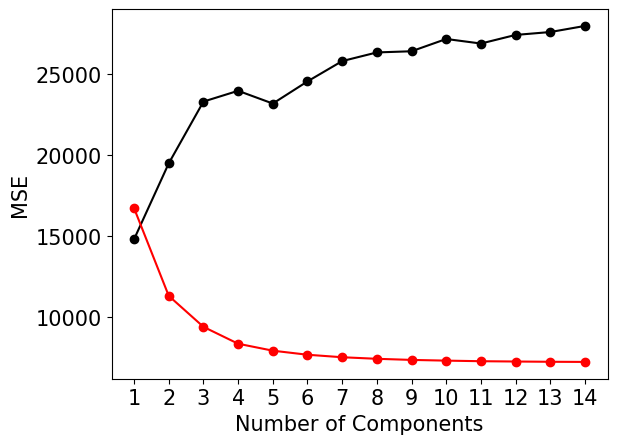

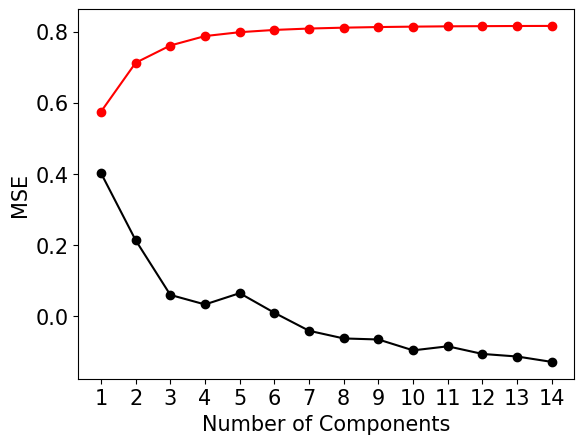

In [17]:
X_bits_train, X_bits_test, y_bits_train, y_bits_test = train_test_split(np_bits_features, Y, \
                                                    test_size=perc_split, random_state=42)

mses_test = []
mses_train = []
r2s_test = []
r2s_train = []
ncomps = []

for ncomp in range(1,15):
    pls = PLSRegression(ncomp)
    pls.fit(X_bits_train, y_bits_train)

    y_pred = pls.predict(X_bits_train)
    y_pred_test = pls.predict(X_bits_test)

    mse_train = mean_squared_error(y_bits_train, y_pred)
    mse_test = mean_squared_error(y_bits_test, y_pred_test)

    r2_train = r2_score(y_bits_train, y_pred)
    r2_test = r2_score(y_bits_test, y_pred_test)

    r2s_train.append(r2_train)
    mses_train.append(mse_train)
    r2s_test.append(r2_test)
    mses_test.append(mse_test)
    ncomps.append(ncomp)

plt.clf()
plt.rcParams.update({'font.size': 15})
#pyplot.plot(ncomps, r2s, '-o', color='black')
plt.plot(ncomps, mses_test, '-o', color='black')
plt.plot(ncomps, mses_train, '-o', color='red')
plt.xlabel('Number of Components')
plt.ylabel('MSE')
plt.xticks(ncomps)
#plt.savefig("PLS_components_MSE.png", bbox_inches="tight", dpi=600)
plt.show()

plt.clf()
plt.rcParams.update({'font.size': 15})
#pyplot.plot(ncomps, r2s, '-o', color='black')
plt.plot(ncomps, r2s_test, '-o', color='black')
plt.plot(ncomps, r2s_train, '-o', color='red')
plt.xlabel('Number of Components')
plt.ylabel('MSE')
plt.xticks(ncomps)
#plt.savefig("PLS_components_MSE.png", bbox_inches="tight", dpi=600)
plt.show()
